In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

## Data Pre-processing

In [37]:
s_data =pd.read_csv("house_prices.txt" , sep=",", header=0,
                             names=["A", "B"])
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,A,B
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860
5,7.4764,4.3483
6,8.5781,12.0000
7,6.4862,6.5987
8,5.0546,3.8166
9,5.7107,3.2522


In [48]:
X=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

[ 9.1302  13.662   11.854    6.8233  11.886    4.3483  12.       6.5987
  3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129   5.3048
  0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875   3.0825
 22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966  12.134
  1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974   0.55657
  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844    8.0043
  1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211   2.4756
  4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054   17.054
  4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259   1.2784
  3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576   0.47953
  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695  0.152
  2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551   0.61705]


## Ploting the data

Text(0.5, 0, 'Population of City in 10,000s')

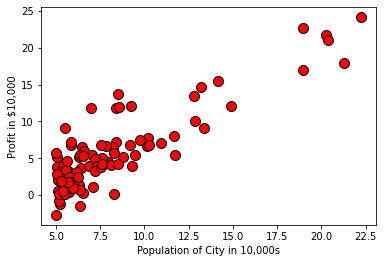

In [53]:
plt.plot(X, y, 'ro', ms=10, mec='k')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [55]:
def propagate(theta, X, Y):
    m=len(Y)
    A=np.dot(theta,X.T)
    cost=(1/2*m)*np.sum((A-Y)**2)
    #Find the gradient descent
    d_theta=(1/m)*np.dot(A-Y,X)
    return d_theta, cost


In [56]:
def optimize(theta, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        d_theta,cost=propagate(theta, X, Y)
        theta=theta-(learning_rate*d_theta)
        costs.append(cost)
    
    return theta, d_theta, costs

In [57]:
def predict(theta, X):
    #w = w.reshape(X.shape[0], 1)
    A=np.dot(theta,X.T)
    return A

In [58]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=False):
    theta=np.zeros((2,1))
    theta,d_theta,cost = optimize(theta, X_train, y_train, num_iterations, learning_rate, print_cost=False)
    
    Y_prediction_test=predict(theta,X_test)
    Y_prediction_train=predict(theta, X_train)
    
    return theta

## Prediction with the training dataset

In [59]:
theta=model(X_train,y_train,X_test,y_test,1000,0.0001,True)
print(theta)

[[0.79418493]
 [0.79418493]]


## Ploting the graph with Line of Best Fit for training data

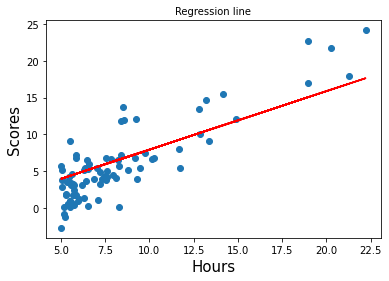

In [60]:
line = np.dot(X_train,theta.T)
plt.scatter(X_train,y_train)
plt.plot(X_train,line,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line",fontsize=10)
plt.show()


## Prediction with the test dataset

In [61]:
Y_predicted=predict(theta,X_test)
print(Y_predicted)

[[ 8.70188425  6.76423186  5.56183588  4.98287507 16.15451561  5.04760114
   4.0742481   4.05645835  5.05014254  8.12927692]
 [ 8.70188425  6.76423186  5.56183588  4.98287507 16.15451561  5.04760114
   4.0742481   4.05645835  5.05014254  8.12927692]]


## Ploting the graph with Line of Best Fit for test data

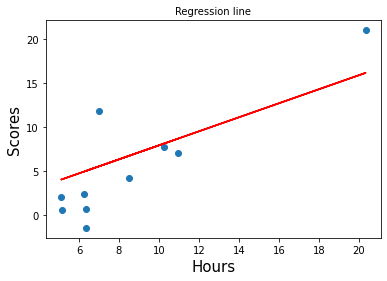

In [62]:
line = np.dot(X_test,theta.T)
plt.scatter(X_test,y_test)
plt.plot(X_test,line,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line",fontsize=10)
plt.show()